In [147]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
file = open("Wiki-Vote.txt", "r")
contents = file.read()

In [149]:
nodes = set(contents.split())
print("Total number of nodes:",len(nodes))
nodes = [int(x) for x in nodes]

Total number of nodes: 7115


In [150]:
edges = list(contents.split("\n"))
edges2 = []

for i in edges:
    x1 = list(i.split())
    x2 = [int(x) for x in x1]
    edges2.append(x2)
    
edges = edges2
print("Total number of edges:", len(edges2))
edges

Total number of edges: 103689


[[30, 1412],
 [30, 3352],
 [30, 5254],
 [30, 5543],
 [30, 7478],
 [3, 28],
 [3, 30],
 [3, 39],
 [3, 54],
 [3, 108],
 [3, 152],
 [3, 178],
 [3, 182],
 [3, 214],
 [3, 271],
 [3, 286],
 [3, 300],
 [3, 348],
 [3, 349],
 [3, 371],
 [3, 567],
 [3, 581],
 [3, 584],
 [3, 586],
 [3, 590],
 [3, 604],
 [3, 611],
 [3, 8283],
 [25, 3],
 [25, 6],
 [25, 8],
 [25, 19],
 [25, 23],
 [25, 28],
 [25, 29],
 [25, 30],
 [25, 33],
 [25, 35],
 [25, 50],
 [25, 54],
 [25, 55],
 [25, 75],
 [25, 80],
 [25, 86],
 [25, 94],
 [25, 127],
 [25, 152],
 [25, 154],
 [25, 182],
 [25, 192],
 [25, 214],
 [25, 224],
 [25, 226],
 [25, 246],
 [25, 252],
 [25, 255],
 [25, 257],
 [25, 261],
 [25, 271],
 [25, 273],
 [25, 280],
 [25, 282],
 [25, 286],
 [25, 299],
 [25, 300],
 [25, 302],
 [25, 306],
 [25, 308],
 [25, 310],
 [25, 322],
 [25, 325],
 [25, 339],
 [25, 348],
 [25, 349],
 [25, 356],
 [25, 358],
 [25, 363],
 [25, 370],
 [25, 371],
 [25, 373],
 [25, 377],
 [25, 379],
 [25, 407],
 [25, 415],
 [25, 422],
 [25, 428],
 [25, 439

In [151]:
def create_adj_matrix(edges, nodes):
    n = max(nodes)
    
    adj_matrix = [[0 for j in range(n+1)] for i in range(n+1)]
    
    for edge in edges:
        adj_matrix[edge[0]][edge[1]] = 1
        
    return adj_matrix

adj_matrix = create_adj_matrix(edges, nodes)
# adj_matrix

In [152]:
def create_adj_list(edges, nodes):
    adj_list = {}
    
    for edge in edges:
        if edge[0] in adj_list:
            adj_list[edge[0]].append(edge[1])
        else:
            adj_list[edge[0]] = [edge[1]]
    
    for i in nodes:
        if i not in adj_list:
            adj_list[i] = []

    return adj_list

adj_list = create_adj_list(edges, nodes)

In [171]:
def calculate_indegrees(adj_matrix, nodes):
    indegrees = {}
    indegrees_list = []
    for i in nodes:
        column = i
        indegrees[i] = 0
        for j in range(len(adj_matrix)):
            indegrees[i] += adj_matrix[j][i]
        indegrees_list.append(indegrees[i])

    return indegrees, indegrees_list

indegrees, indegrees_list = calculate_indegrees(adj_matrix, nodes)


In [172]:
def calculate_outdegrees(adj_list, nodes):
    outdegrees = {}
    outdegrees_list = []
    for i in nodes:
        outdegrees[i] = 0
        outdegrees[i] = len(adj_list[i])
        outdegrees_list.append(len(adj_list[i]))
    
    return outdegrees, outdegrees_list

outdegrees, outdegrees_list = calculate_outdegrees(adj_list, nodes)


In [155]:
def average(degree):
    average_degree = 0
    
    for i in degree:
        average_degree += degree[i]

    return average_degree / len(degree)

average_indegree = average(indegrees)
average_outdegree = average(outdegrees)

print("Average Indegree:", average_indegree)
print("Average Outdegree:", average_outdegree)

Average Indegree: 14.573295853829936
Average Outdegree: 14.573295853829936


In [156]:
max_indegree_node = None
max_indegree = 0

for i in indegrees:
    if max_indegree <= indegrees[i]:
        max_indegree = indegrees[i]
        max_indegree_node = i
        
print("Node with maximum indegree is:", max_indegree_node, "with indegree:", max_indegree)

max_outdegree_node = None
max_outdegree = 0

for i in outdegrees:
    if max_outdegree <= outdegrees[i]:
        max_outdegree = outdegrees[i]
        max_outdegree_node = i
        
print("Node with maximum outdegree is:", max_outdegree_node, "with outdegree:", max_outdegree)

Node with maximum indegree is: 4037 with indegree: 457
Node with maximum outdegree is: 2565 with outdegree: 893


In [157]:
total_possible_edges = len(nodes)*(len(nodes)-1)
density = len(edges)/total_possible_edges
print("The density of the graph is", density)

The density of the graph is 0.0020485375110809584


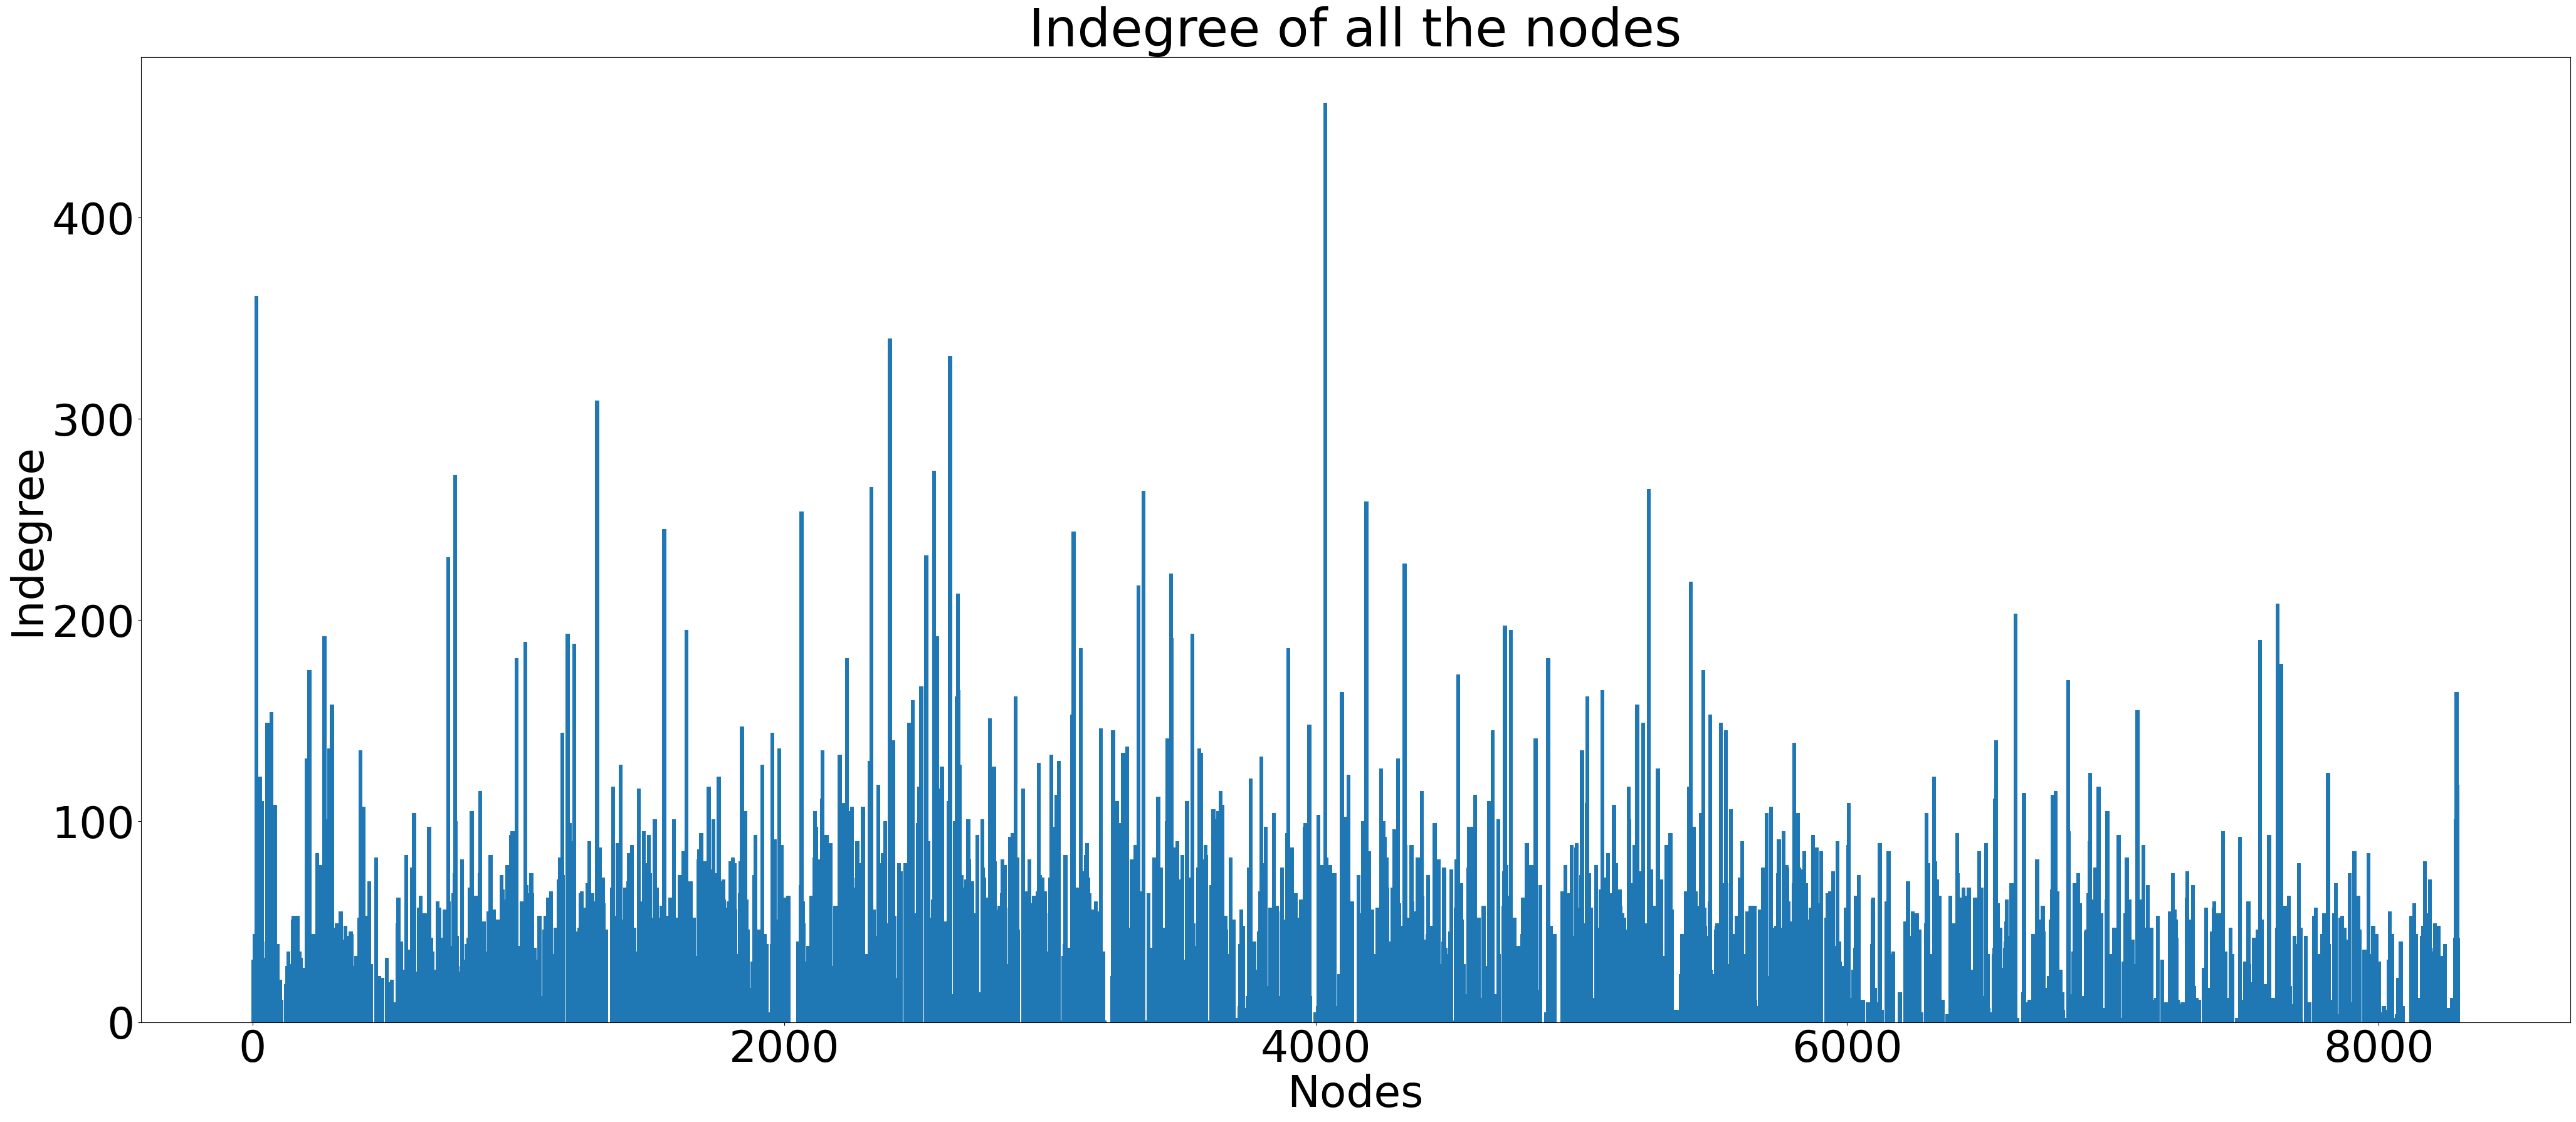

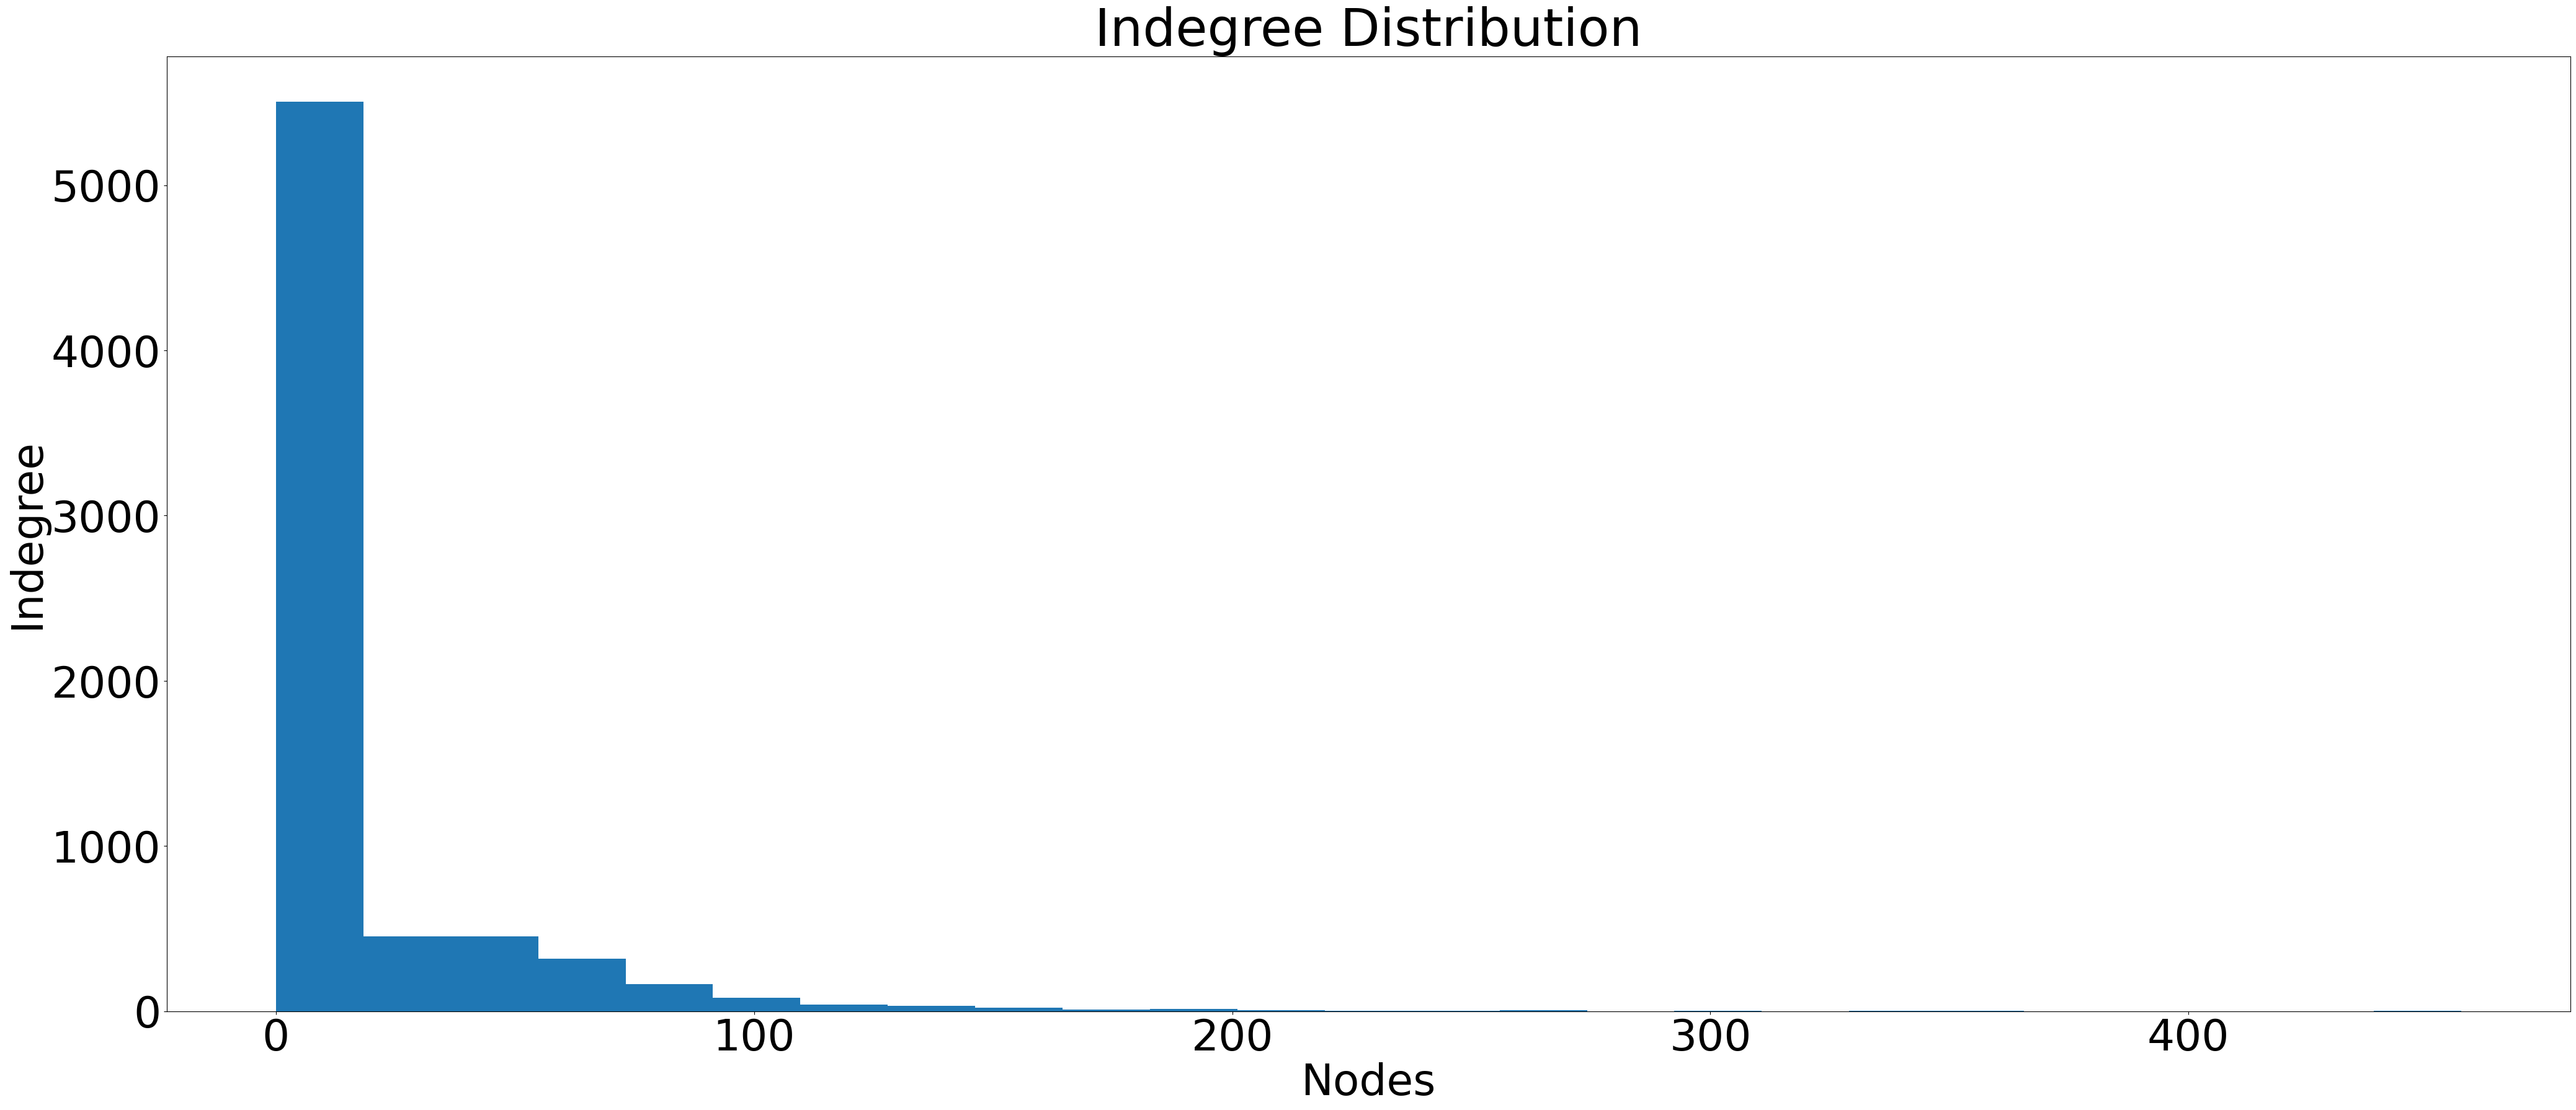

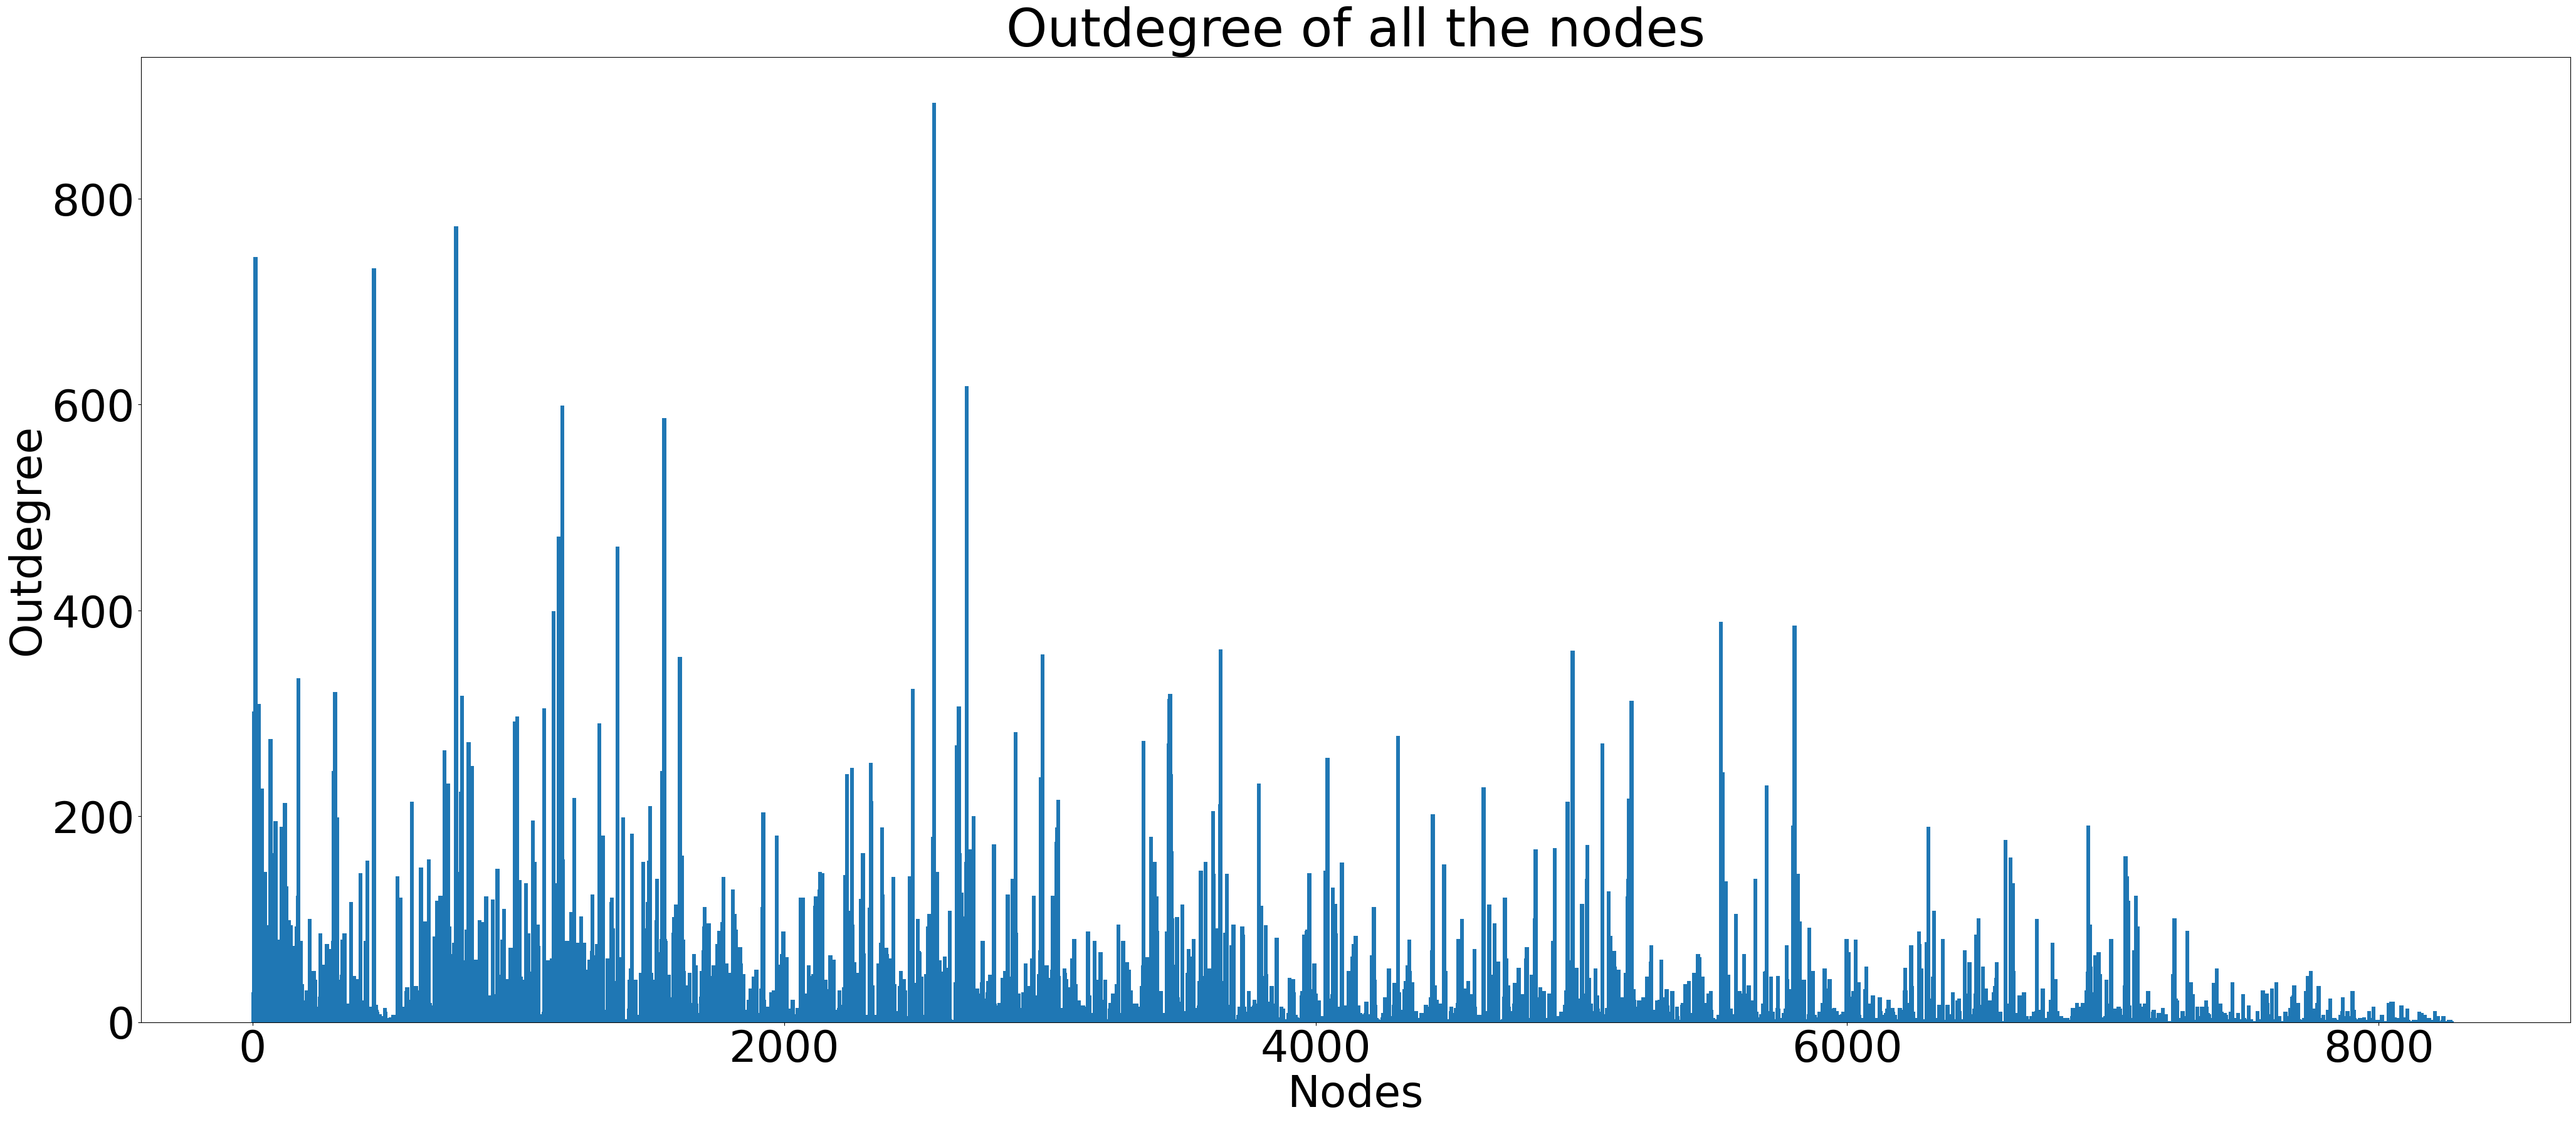

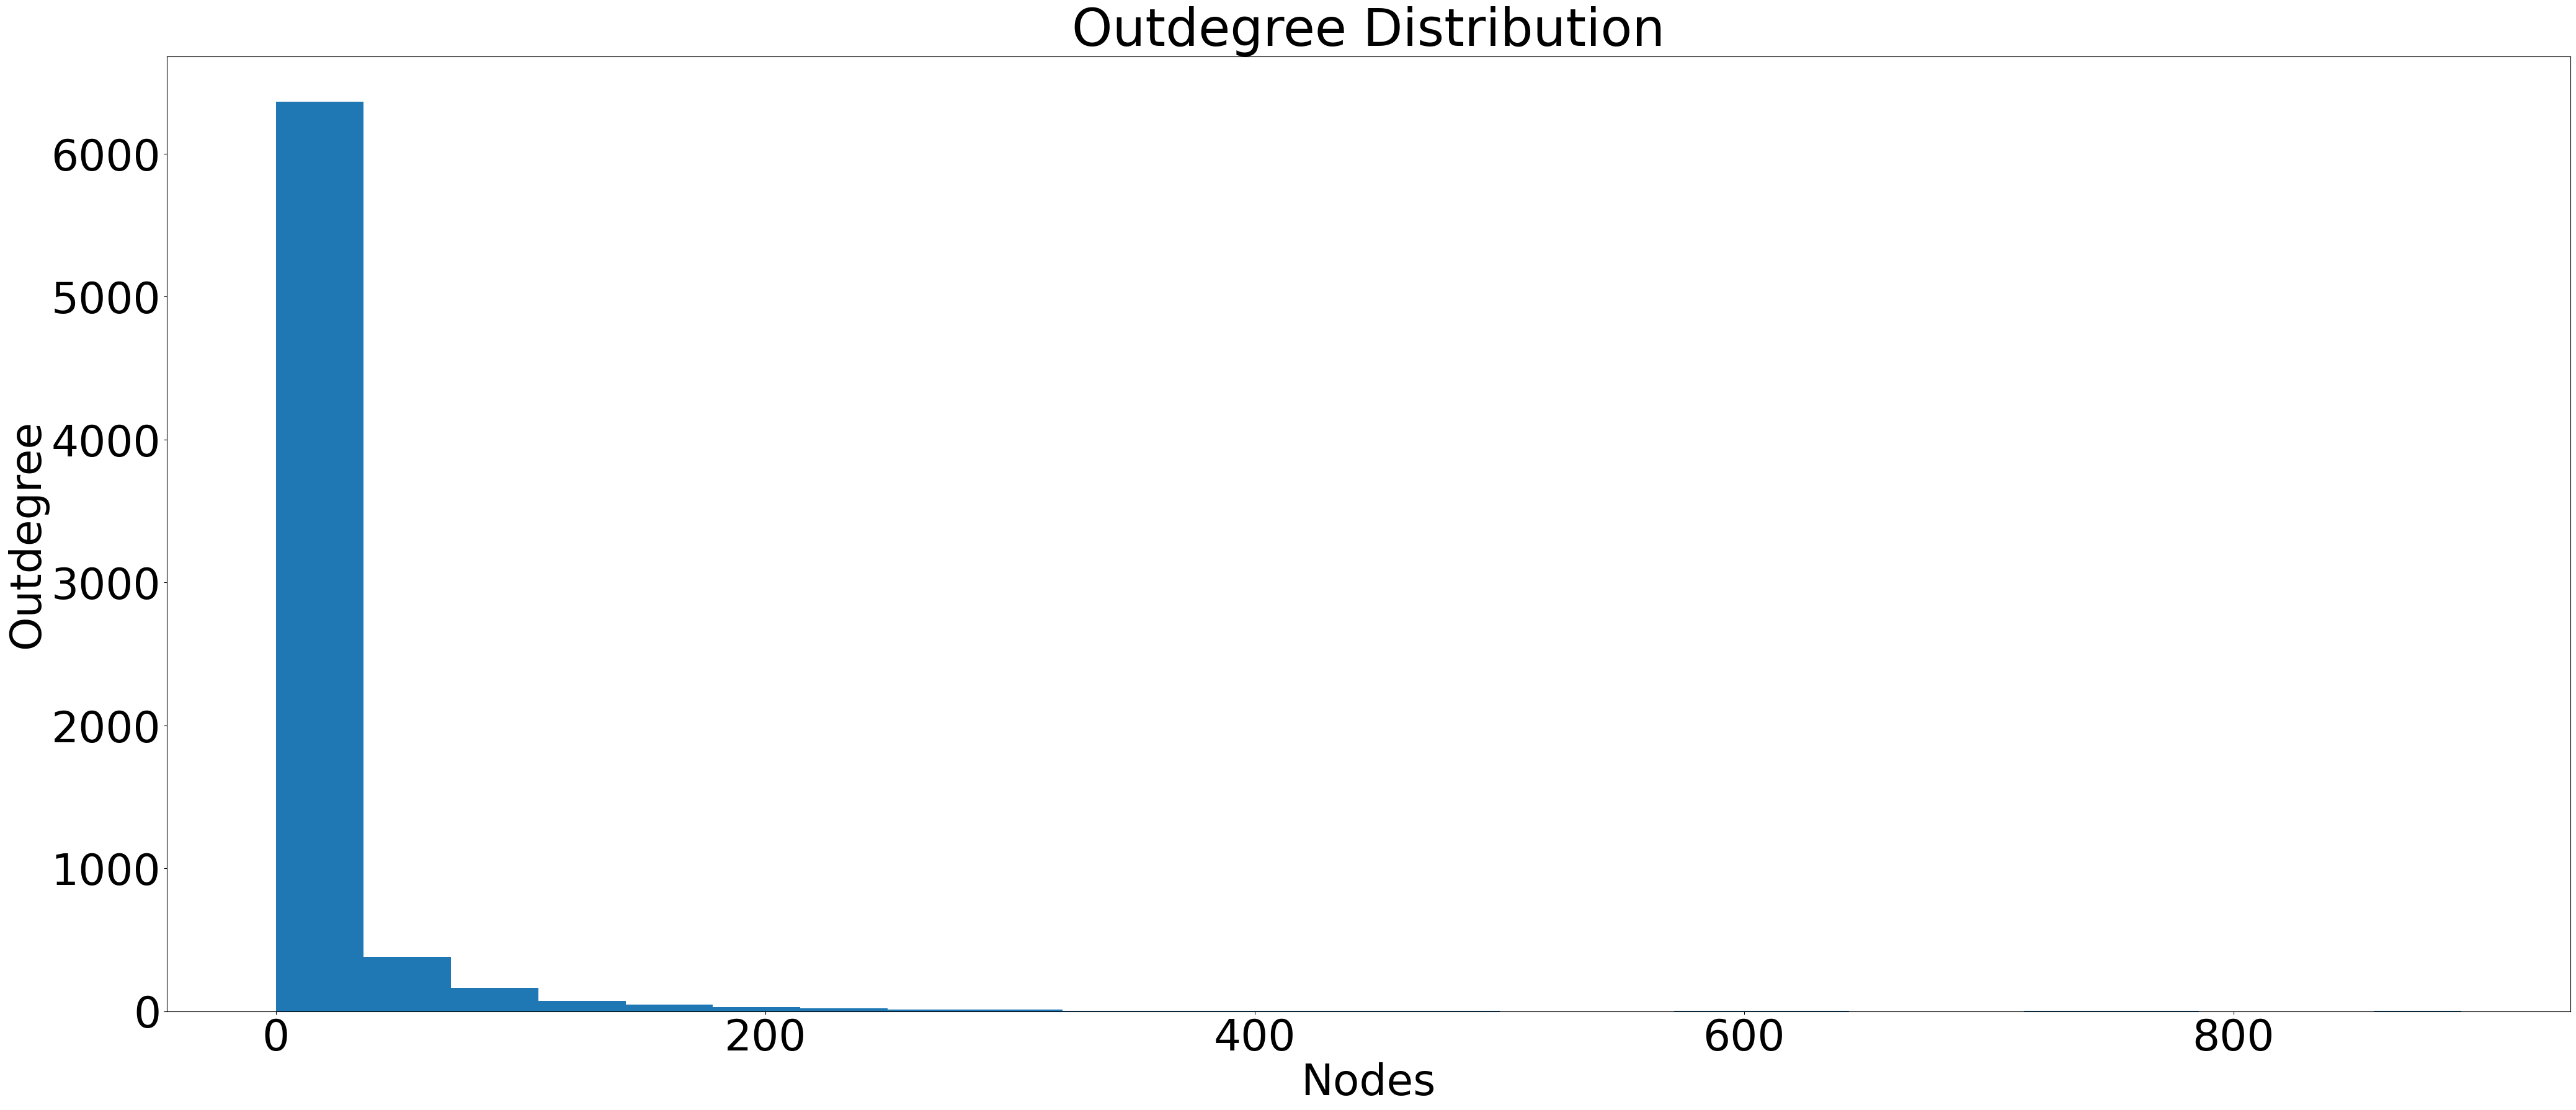

In [206]:
def plot_distribution(data, data_list, string):
    plt.rcParams.update({'font.size': 50})
    
    labels = list(data.keys())
    values = list(data.values())
    
    plt.figure(figsize=(50,20))

    plt.bar(labels, values, width = 15)
    plt.xlabel('Nodes')
    plt.ylabel(string)
    plt.title(string + " of all the nodes")
    plt.show()
    
#     plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(50,20))
    plt.hist(data_list, bins = 25)
    plt.xlabel('Nodes')
    plt.ylabel(string)
    plt.title(string + ' Distribution')
    plt.show()
# print(indegrees_list)
plot_distribution(indegrees, indegrees_list, "Indegree")
plot_distribution(outdegrees, outdegrees_list, "Outdegree")

In [199]:
def calculate_lcc(adj_list):
    lcc = []
    
    for node, neighbors in adj_list.items():
        k_in = len([n for n in neighbors if node in adj_list[n]])
        k_out = len(neighbors) - k_in
        
        if k_in + k_out < 2:
            lcc.append(0)
            continue
        
        num_edges = 0
        for i in range(k_in):
            for j in range(k_in, k_in+k_out):
                if neighbors[j] in adj_list[neighbors[i]]:
                    num_edges += 1
        
        if k_in*k_out != 0:
            lcc.append(num_edges/(k_in*k_out))
        
    return lcc



In [200]:
lcc_list = calculate_lcc(adj_list)

4277


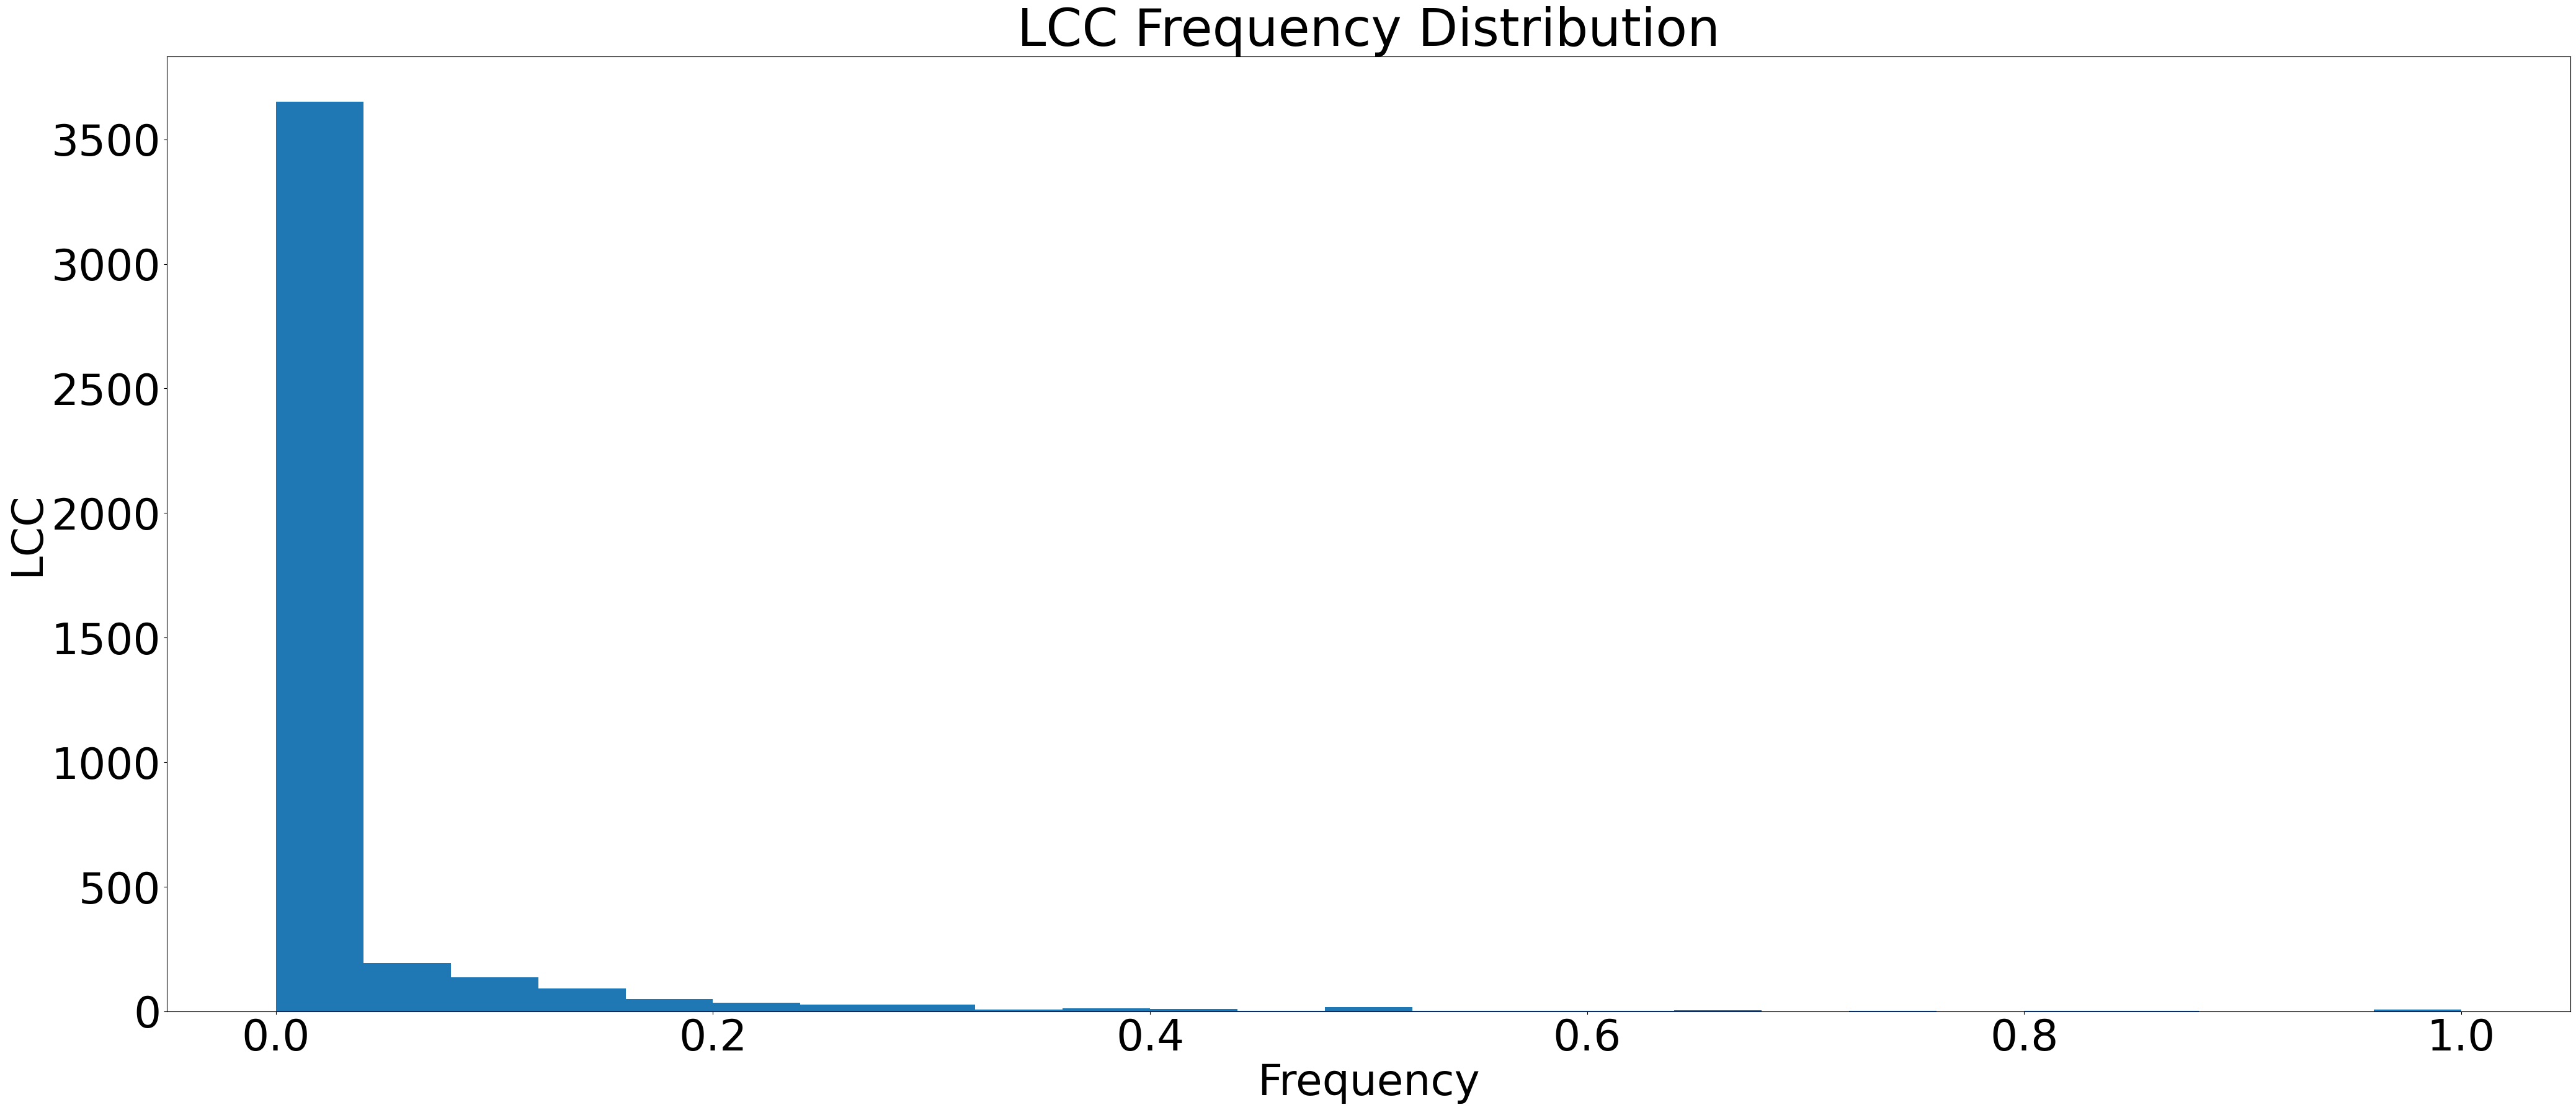

In [205]:
plt.figure(figsize=(50,20))
plt.hist(lcc_list, bins = 25)
plt.xlabel('Frequency')
plt.ylabel('LCC')
plt.title("LCC Frequency" + ' Distribution')
plt.show()
